# 2. Линейные модели и Градиентный спуск.

Альтернативное изложение некоторых частей материала есть [тут](https://alexanderdyakonov.wordpress.com/2019/10/31/%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/), весьма рекомендуется к ознакомлению. 


In [199]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")
X = data.drop("survived", axis = 1)
y = data["survived"]
X.head()

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,29.0000,0,0,211.3375,0,0,1,1,0
1,1,0.9167,1,2,151.5500,0,0,1,0,1
2,1,2.0000,1,2,151.5500,0,0,1,1,0
3,1,30.0000,1,2,151.5500,0,0,1,0,1
4,1,25.0000,1,2,151.5500,0,0,1,1,0


In [148]:
X.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [154]:
X.sex.value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [153]:
X.isna().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

- Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival Survival (0 = No; 1 = Yes)
- name Name
- sex Sex
- age Age
- sibsp Number of Siblings/Spouses Aboard
- parch Number of Parents/Children Aboard
- ticket Ticket Number
- fare Passenger Fare (British pound)
- cabin Cabin
- embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat Lifeboat
- body Body Identification Number
- home.dest Home/Destination

In [102]:
X.boat.value_counts()

boat
13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
9          25
11         25
16         23
8          23
7          23
D          20
6          20
12         19
2          13
A          11
B           9
1           5
5 7         2
C D         2
13 15       2
5 9         1
8 10        1
13 15 B     1
15 16       1
Name: count, dtype: int64

In [164]:
pd.get_dummies(X.embarked, prefix="embarked").astype(int)

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,1,0,0
1305,1,0,0
1306,1,0,0
1307,1,0,0


In [162]:
import numpy as np
np.array([0]) - np.array([1])

array([-1])

In [165]:
X = X.join(pd.get_dummies(X.embarked,prefix="embarked").astype(int))
X = X.join(pd.get_dummies(X.sex, prefix="sex").astype(int) )


In [166]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,0,1,1,0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,0,1,0,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1,1,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,0,1,0,1
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1,1,0


In [167]:
X.drop(columns=["name", "ticket", "boat", "body", "home.dest"],inplace=True)
X = X.drop(columns=["embarked", "sex", "cabin"])

In [168]:
X.head()

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,29.0000,0,0,211.3375,0,0,1,1,0
1,1,0.9167,1,2,151.5500,0,0,1,0,1
2,1,2.0000,1,2,151.5500,0,0,1,1,0
3,1,30.0000,1,2,151.5500,0,0,1,0,1
4,1,25.0000,1,2,151.5500,0,0,1,1,0


In [169]:
X.loc[10]

pclass          1.000
age            47.000
sibsp           1.000
parch           0.000
fare          227.525
embarked_C      1.000
embarked_Q      0.000
embarked_S      0.000
sex_female      0.000
sex_male        1.000
Name: 10, dtype: float64

In [172]:
sum((X.loc[10] - X.loc[11]) ** 2)

843.0

In [192]:
X.age = X.age.fillna(X.age.mean())
X.fare = X.fare.fillna(X.fare.mean())


In [173]:
X.age.mean()

29.8811345124283

## 2.1 Градиент

In [174]:
import numpy as np
import matplotlib.pyplot as plt

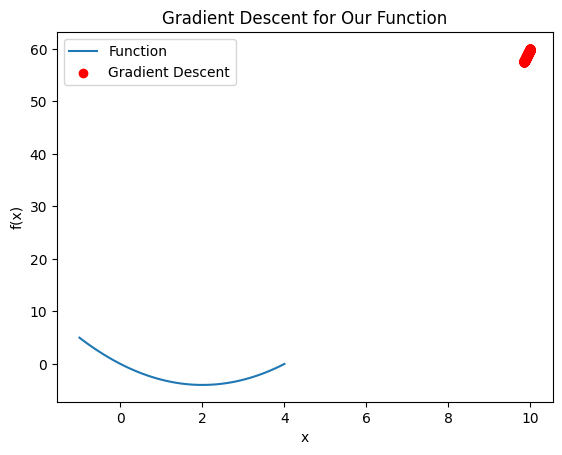

In [180]:
def f(x):
    return x**2 - 4*x

def derivative(x):
    return 2 * x - 4


x = 10
traj = [x]
lr = 1e-5 #0.01

for iter in range(1000):
    x -= lr * derivative(x)
    traj.append(x)

# Визуализация
xs = np.linspace(-1, 4, 100)
ys = f(xs)

plt.plot(xs, ys, label='Function')
plt.scatter(traj, f(np.array(traj)), color='red', label='Gradient Descent')
plt.title('Gradient Descent for Our Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [193]:
def f(x,y):
    return x**2 + y**2 + 2*x + 2*y + 1

def dfdx(x, y):
    return 2*x  + 2

def dfdy(x, y):
    return 2*y + 2

x = 5
y = 5
x_traj = [x]
y_traj = [y]

lr = 1e-3

for iter in range(50000):
    x -= lr * dfdx(x,y)
    y -= lr * dfdy(x,y)
    x_traj.append(x)
    y_traj.append(y)

x_traj = np.array(x_traj)
y_traj = np.array(y_traj)

Text(0.5, 0, 'f(x, y)')

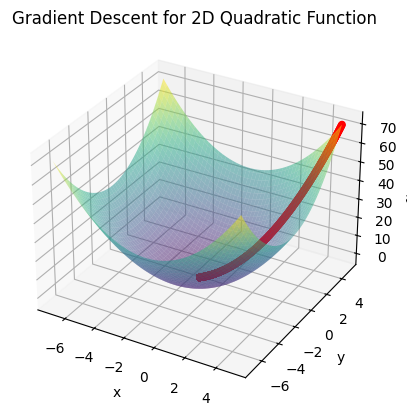

In [194]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(-7, 5, 100)
y_vals = np.linspace(-7, 5, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_grid = f(X_grid, Y_grid)

ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5, cmap='viridis')
ax.scatter(x_traj, y_traj, f(x_traj, y_traj), color='red')
ax.set_title('Gradient Descent for 2D Quadratic Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

## Линейная регрессия

Давайте вспомним, что такое задача линейной регрессии в рамках машинного обучения. 

У нас есть обучающая выборка $(X, \boldsymbol{y})$, c $n$ объектами и $m$ признаками. (Значит размер $X$ - $n\times m$)

Алгоритм решения выбирается из пространства линейных функций:

$a(\boldsymbol{x}_k) = w_0 + w_1x_{k, 1} + \ldots + w_mx_{k, m}$


Нам нужно найти такое $a(\cdot)$, чтобы решилась система уравнений
$$\begin{cases}
a(\boldsymbol{x}_1) = w_0 + w_1x_{1,1} + \ldots + w_mx_{1,m} =  y_1\\
\ldots \\
a(\boldsymbol{x}_k) = w_0 + w_1x_{k,1} + \ldots + w_mx_{k,m} =  y_k\\
\ldots \\
a(\boldsymbol{x}_n) = w_0 + w_1x_{n,1} + \ldots + w_mx_{n,m} =  y_n
\end{cases}$$

Давайте запишем в матричном виде, предварительно добавив к $X$ единичный столбец слева. $X = (I_{n\times 1}|X)$. Получим:

$$X\boldsymbol{w} = \boldsymbol{y}$$


Но что делать если уравнений (строк или объектов в выборке) больше чем неизвестных (параметров w, соответствующих фичам)?

Тогда мы не можем точно решить задачу и нужно искать наилучшее решение как-то по-другому. Давайте минимизировать лосс MSE:

$$Q(a, X, \boldsymbol{y}) =  MSE = \frac{1}{n}\sum_{k=1}^{n} (a(\boldsymbol{x}_k)-y_k)^2 \rightarrow min$$


Который можно записать в более аккуратном матричном виде:
$$L(\boldsymbol{w}) = \frac{1}{n}\lVert X\boldsymbol{w} - \boldsymbol{y}\rVert_2^2 \rightarrow min$$

$\lVert \boldsymbol{d} \rVert_2^2 = \sum_{i=1}^{n}d_1^2 + \ldots + d_n^2$ -квадрат нормы эвклидовой метрики (т.е. просто корень не извлекаем. На то, с какими весами достигается минимум это не влияет)

Теперь чтобы найти $w$ - применим единственно возможное действие, когда мы видим минимизацию линейной функции - возьмем производную по аргументу вектору или (тоже самое) возьмем частные производные каждого $w_i$.

$$\nabla_{\boldsymbol{w}}L = \begin{cases}
\frac{\partial L}{\partial w_0} = \frac{1}{n}\sum_{k=1}^{n} 2x_{k, 0}(a(\boldsymbol{x}_k)-y_k)\\
\ldots \\
\frac{\partial L}{\partial w_i} = \frac{1}{n}\sum_{k=1}^{n} 2x_{k, i}(a(\boldsymbol{x}_k)-y_k)\\
\ldots \\
\frac{\partial L}{\partial w_m} = \frac{1}{n}\sum_{k=1}^{n} 2x_{k, m}(a(\boldsymbol{x}_k)-y_k)
\end{cases}$$

$\nabla_{\boldsymbol{w}}L$ - называется **градиентом** линейной функции $L$, по парамеру вектору $\boldsymbol{w}$ 

Если на эту систему внимательно посмотреть (или изучить матричное дифференцирование), можно понять, что данную систему можно записать тоже в матричном виде:

$$ \nabla_{\boldsymbol{w}}L = \frac{2}{n}X^{T}(X\boldsymbol{w} - \boldsymbol{y})$$

Осталось совершить последнее стандартное действие - приравнять производную к нулевому вектору и решить матричное уравнение.

$$ 0 = \frac{2}{n}X^{T}(X\boldsymbol{w} - \boldsymbol{y})$$

$$ X^{T}X\boldsymbol{w} = X^{T}\boldsymbol{y}$$

$$ \boldsymbol{w} = (X^{T}X)^{-1}X^{T}\boldsymbol{y}$$

In [200]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.predict(X_test)

array([0.94552084, 0.54981766, 1.03686242, ..., 0.20612795, 0.20330946,
       0.09610842])

In [207]:
X.head()

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,29.0000,0,0,211.3375,0,0,1,1,0
1,1,0.9167,1,2,151.5500,0,0,1,0,1
2,1,2.0000,1,2,151.5500,0,0,1,1,0
3,1,30.0000,1,2,151.5500,0,0,1,0,1
4,1,25.0000,1,2,151.5500,0,0,1,1,0


In [206]:
linreg.coef_

array([-1.55551027e-01, -5.63698457e-03, -4.22357176e-02, -2.67564261e-03,
        2.21952756e-04, -1.05935214e-01, -1.81573179e-01, -2.02006555e-01,
        2.46575654e-01, -2.46575654e-01])

In [209]:

coefs = pd.DataFrame(
    linreg.coef_, columns=["value"], index=X.columns
)
coefs.sort_values(by="value")

,value
sex_male,-0.246576
embarked_S,-0.202007
embarked_Q,-0.181573
pclass,-0.155551
embarked_C,-0.105935
sibsp,-0.042236
age,-0.005637
parch,-0.002676
fare,0.000222
sex_female,0.246576


## Регуляризация



$$L =\frac{1}{n}(\frac{1}{2}\lVert X\boldsymbol{w} - \boldsymbol{y} \rVert_2^2 + \frac{\lambda}{2}\lVert \boldsymbol{w} \rVert_2^2) \rightarrow \min$$

Точным решением этой задачи минимазации будет
$$\boldsymbol{w} = (X^TX + \lambda E)^{-1}X^{T}\boldsymbol{y}$$

(можете вывести это самостоятельно или посмотреть схему вывода [тут](https://alexanderdyakonov.wordpress.com/2019/10/31/%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/))

Круто то, что матрица $(X^{T}X + \lambda E)$ - всегда будет иметь обратную, потому что обратной нет в случае линейной зависимости строк, а линейная зависимость между строками не переживёт прибавления $\lambda E$, так как мы докинем лямбду в разные компоненты для разных векторов и это сломает выразимость одних через другие

##### Регуляризация может предотвратить переобучение!

![ridge](images/ridge.png)

Еще на деле часто применяют $Lasso$ или $L1$ регуляризацию:
$$L =\frac{1}{n}(\frac{1}{2}\lVert X\boldsymbol{w} - \boldsymbol{y} \rVert_2^2 + \lambda\lVert \boldsymbol{w} \rVert) \rightarrow \min$$
$\lVert \boldsymbol{w} \rVert = \sum_{i=1}^{n}|w_i|$ - сумма модулей

![coefs](images/lasso_ridge_coefficients.png)

In [133]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X, y)
ridge.predict(X)

array([0.94841046, 0.42005434, 0.89623338, ..., 0.20949597, 0.20667588,
       0.1000166 ])

In [134]:
coefs = pd.DataFrame(
    ridge.coef_, columns=["value"], index=X.columns
)
coefs.sort_values(by="value")

,value
sex_male,-0.241145
pclass,-0.149213
cabin_C22 C26,-0.133882
cabin_A29,-0.085858
cabin_C49,-0.078594
...,...
cabin_F4,0.102668
cabin_E25,0.105857
cabin_E24,0.108210
cabin_A34,0.114187


## Посчитаем  сложности 

Мы долго говорили о красивой математике, чтобы сейчас ее разом выбросить. Посмотрим на наше решение

$$\boldsymbol{w} = (X^TX + \lambda E)^{-1}X^{T}\boldsymbol{y}$$

Подсчет обратной матрицы составляет [$O(m^3)$](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0)


Перемножение 2-х матриц (n,k) и (k,m): [$O(nmk)$](https://ru.wikipedia.org/wiki/%D0%A3%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86)

Суммарно у нас затратится $O(n^2m + m + m^3 + nm + m) = O(n^2m + m^3 )$

При $n > 1000000$ мы уже вымрем, а это не такое уж  и большое число объектов для реальных задач мл. Нужно придумать что-то получше.


## Градиентный спуск


Давайте вернемся к **градиенту**, который мы считали для регуляризации.


$$ \nabla_{\boldsymbol{w}}L = \frac{1}{n} X^{T}(X\boldsymbol{w} - \boldsymbol{y})$$

Градиент обозначает движение функции на возрастание. Почему бы нам не двигаться против возрастания функции, чтобы достичь минимума?


Пусть мы взяли какую-то точку на нашей гиперплоскости (инициализировали случайные веса) и посчитали градиент в этой точке и решили двигаться в другом направлении?


Для вектора
$$\boldsymbol{w}^{(t+1)} = \boldsymbol{w}^{(t)} - \eta \nabla_{\boldsymbol{w}}L $$

Для элемента вектора
$$w_i^{(t+1)} = w_i^{(t)} - \frac{\eta}{n} \sum_{k=1}^{n} 2x_{k, i}(a(\boldsymbol{x}_k)-y_k) $$


$t$ - номер итерации. 

$\eta$ - learning rate (коэффициент шага обучения)

Такой процесс назовем **градиентным спуском**. Очевидно, что градиентный спуск сходится в какой-нибудь минимум.

Будет выглядять примерно так- 

![grad](images/grad.png)

### SGD


А давайте теперь не к минимуму всей выборки, а только к **одному произвольному объекту**


Теперь вместо этого
$$ \nabla_{\boldsymbol{w}}L = \frac{2}{n}X^{T}(X\boldsymbol{w} - \boldsymbol{y})$$

Мы получили вот такое для произвольной пары $(\boldsymbol{x}_k, y_k)$

$$ \nabla_{\boldsymbol{w}}L^k = 2(\boldsymbol{x}_k)^{T}(\boldsymbol{x}_k^T\boldsymbol{w} - y_k)$$

**Это не k-ый элемент вектора градиента, это вектор градиента посчитанный только по объекту $\boldsymbol{x}_k$**

Тогда пересчет весов будет происходить соответственно

Для вектора
$$\boldsymbol{w}^{(t+1)} = \boldsymbol{w}^{(t)} - \eta \nabla_{\boldsymbol{w}}L^k$$

Для элемента вектора
$$w_i^{(t+1)} = w_i^{(t)} - \eta 2 x_{k,i}(a(\boldsymbol{x}_k)-y_k) $$

На двойку в целом наплевать

$$w_i^{(t+1)} = w_i^{(t)} - \eta x_{k,i}(a(\boldsymbol{x}_k)-y_k) $$
